Хgboost

In [1]:
pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import xgboost
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [4]:
dataset=pd.read_csv('кейс_7_1.csv')
dataset.head()

,Unnamed: 0,Units,Revenue,Manufacturer_y,year,month,day,Category_Rural,Category_Urban,Category_Youth,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Region_East,Region_West
0,0,0.0,-0.401515,VanArsdel,2010,9,30,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0.0,-0.401515,VanArsdel,2010,9,30,False,True,False,...,True,False,False,False,False,False,False,False,False,False
2,2,0.0,-0.401515,VanArsdel,2010,9,30,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,4,0.0,-0.401515,VanArsdel,2010,9,30,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,5,0.0,-0.401515,VanArsdel,2010,9,30,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
col_drop=['Unnamed: 0']
s=dataset.drop(col_drop,axis=1)

In [6]:
cc= s.select_dtypes(include=['object']).columns
cc

Index(['Manufacturer_y'], dtype='object')

In [7]:
le = LabelEncoder()
ob=['Manufacturer_y']
ob=s.select_dtypes(include=['object'])
for colsn in ob:
    s[colsn] = le.fit_transform(s[colsn].astype(str))

In [8]:
s

,Units,Revenue,Manufacturer_y,year,month,day,Category_Rural,Category_Urban,Category_Youth,Segment_Convenience,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Region_East,Region_West
0,0.0,-0.401515,11,2010,9,30,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
1,0.0,-0.401515,11,2010,9,30,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
2,0.0,-0.401515,11,2010,9,30,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
3,0.0,-0.401515,11,2010,9,30,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0.0,-0.401515,11,2010,9,30,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135655,0.0,-0.945055,7,2011,11,2,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
135656,0.0,-0.945055,7,2011,1,26,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
135657,0.0,-0.945055,7,2011,1,6,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
135658,0.0,-0.945055,7,2011,5,10,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
boolean_columns = s.select_dtypes(include='bool').columns

# Вывести названия булевых столбцов
print(boolean_columns)

Index(['Category_Rural', 'Category_Urban', 'Category_Youth',
       'Segment_Convenience', 'Segment_Extreme', 'Segment_Moderation',
       'Segment_Productivity', 'Segment_Regular', 'Segment_Select',
       'Segment_Youth', 'isVanArsdel_Yes', 'IsCompeteHide_Y',
       'MfgisVanArsdel_Yes', 'State_AL', 'State_AR', 'State_AZ', 'State_CA',
       'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA',
       'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY',
       'State_LA', 'State_MA', 'State_MD', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
       'State_WV', 'State_WY', 'Region_East', 'Region_West'],
      dtype='object')


In [11]:
columns_to_encode = ['Category_Rural', 'Category_Urban', 'Category_Youth',
                     'Segment_Convenience', 'Segment_Extreme', 'Segment_Moderation',
                     'Segment_Productivity', 'Segment_Regular', 'Segment_Select',
                     'Segment_Youth', 'isVanArsdel_Yes', 'IsCompeteHide_Y',
                     'MfgisVanArsdel_Yes', 'State_AL', 'State_AR', 'State_AZ', 'State_CA',
                     'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA',
                     'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY',
                     'State_LA', 'State_MA', 'State_MD', 'State_MI', 'State_MN', 'State_MO',
                     'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
                     'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
                     'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
                     'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
                     'State_WV', 'State_WY', 'Region_East', 'Region_West']

# Создаем экземпляр LabelEncoder
le = LabelEncoder()

# Применяем LabelEncoder к каждому столбцу из списка
for col in columns_to_encode:
    s[col] = le.fit_transform(s[col].astype(str))

# Теперь все указанные столбцы будут преобразованы в числовые значения

In [12]:
s.head()

,Units,Revenue,Manufacturer_y,year,month,day,Category_Rural,Category_Urban,Category_Youth,Segment_Convenience,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Region_East,Region_West
0,0.0,-0.401515,11,2010,9,30,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.0,-0.401515,11,2010,9,30,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0.0,-0.401515,11,2010,9,30,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.0,-0.401515,11,2010,9,30,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.0,-0.401515,11,2010,9,30,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#выгрузка результирующего csv-файла
s.to_csv('кейс_7_1.csv',encoding='utf-8')

In [16]:
# разделение данных X и y - выделение целевого признака
X = s.drop('Manufacturer_y',axis=1)
Y = s['Manufacturer_y']

In [17]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
X_train

,Units,Revenue,year,month,day,Category_Rural,Category_Urban,Category_Youth,Segment_Convenience,Segment_Extreme,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Region_East,Region_West
41480,0.0,-1.203236,2012,10,26,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
124977,0.0,-0.727639,2011,9,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2287,0.0,-0.401515,2011,6,23,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
85590,0.0,-0.238454,2011,6,21,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
928,0.0,-0.401515,2013,12,29,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66455,0.0,-0.727639,2013,11,11,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53459,0.0,-0.632520,2013,2,23,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
10742,0.0,-1.080940,2011,11,10,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49689,0.0,-1.230413,2010,10,23,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [18]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [20]:
accuracy_1 = accuracy_score(y_test, predictions)
print("Accuracy XGB: %.2f%%" % (accuracy_1 * 100.0))

Accuracy XGB: 86.95%


In [24]:
features_xg =[0, -1.203236, 2012, 10, 26, 0, 0, 1, 0, 0, 1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0] #сколько признаков столько и цифр
pred_y = model.predict([features_xg])
print('Predicted Class: %d' % pred_y[0])

Predicted Class: 11


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

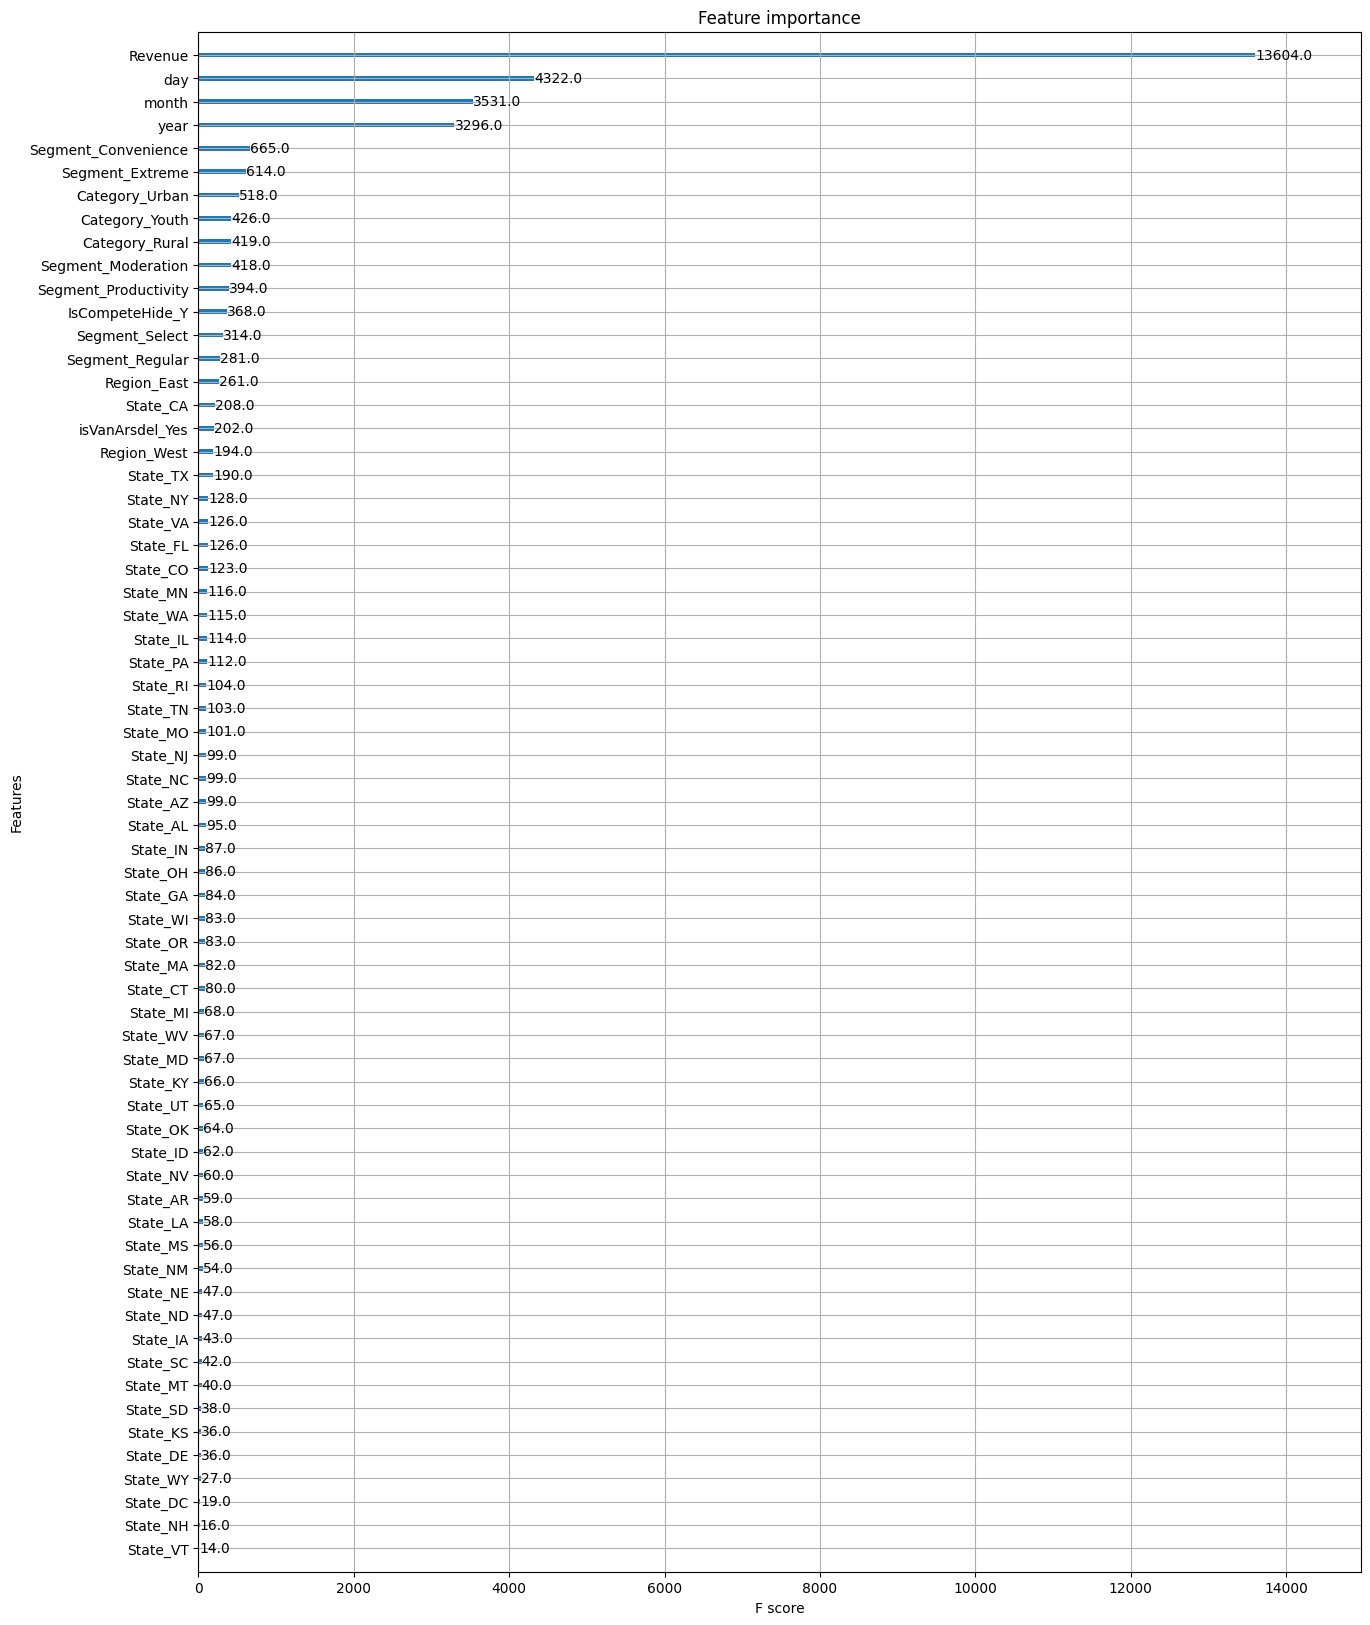

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 20)
plot_importance(model)